In [1]:
#Analysis and data-loading functions
"""
Objective:
    *Docs
        - Create summary to easily access description for different data-attributes
    *Loading
        - Create functions that load arbitrairy amount of json-data for the same
        type of statistics.
        - Create functions to concatinate json-data of different type
    *Analysis
        - Visualize data-attributes in graphs
"""

'\nObjective:\n    *Docs\n        - Create summary to easily access description for different data-attributes\n    *Loading\n        - Create functions that load arbitrairy amount of json-data for the same\n        type of statistics.\n        - Create functions to concatinate json-data of different type\n    *Analysis\n        - Visualize data-attributes in graphs\n'

In [4]:
from directory import Directory 
from directory import StorageConfig 
import pandas as pd
from pprint import pprint
from functools import reduce 
dirs = Directory()

In [5]:
#!/usr/bin/python
"""
Updates .json files with new data from the api if the json exists

Looks if fixtureID exists in .json, if it doesn't exist it gets append
"""
def deep_get(dictionary, keys, default=None):
    """Get values of nested keys from dict
        Args:
            dictionary(dict): Dict with nested keys
            keys(dict.keys()): "." separated chain of nested keys, ex "info.player.name"
    """
    return reduce(lambda d, key: d.get(key, default) if isinstance(d, dict) else default, keys.split("."), dictionary)

def load_player_stats(year):
    """Load player_stats json files into a container
        Args:
            year(int): year of player_stats json
    """
    try: 
        file = f'EN_PR_{year}_playerstats.json'
        stats_file = dirs.load_json(file, StorageConfig.STATS_DIR)
        stats_file.append({'season': year})
        return stats_file
    except FileNotFoundError as e:
        print(file, "not found")

def read_playerstats(data):
    """Read stats from ...playerstats.json into flattened
    list of dicts. 
    """
    try:
        stats_all = []
        stats_temp = {}
        for d in data:
            stats_temp = {}
            if 'stats' in d:
                stats = d['stats']
                for dicts in stats:
                    stats_temp['id'] = dicts.get('id')
                    if dicts.get('name') != None:
                        stats_temp[dicts.get('name')] = dicts.get('value')
                stats_all.append(stats_temp)
        return stats_all
    except TypeError as e:
        print("Check that data exists and is loaded correctly")

def read_playerinfo(data):
    """Read info from ...playerstats.json into flattened
    list of dicts. 
    """
    info_all = []
    # try:
    for d in data:
        stats_temp = {}
        if 'info' in d:
            stats = d['info']
            stats_temp = \
                {'age' : stats.get('age'),
                'id' : stats.get('id'),
                'birth' : deep_get(stats, 'birth.date.label'),
                'birth_exact' : deep_get(stats, 'birth.date.millis'),
                'country' : deep_get(stats, 'birth.country.country'),
                'isoCode' : deep_get(stats, 'birth.country.isoCode'),
                'loan' : deep_get(stats, 'info.loan'),
                'position' : deep_get(stats, 'info.position'),
                'positionInfo' : deep_get(stats, 'info.positionInfo'),
                'shirtNum' : deep_get(stats, 'info.shirtNum'),
                'name' : deep_get(stats, 'name.display'),
                'first' : deep_get(stats, 'name.first'),
                'last' : deep_get(stats, 'name.last'),
                'nationalTeam' : deep_get(stats, 'nationalTeam.country'),
                'playerId' : stats.get('playerId'),
                'season' : data[-1]['season']}
            info_all.append(stats_temp)

    # except TypeError as e:
    #     print("Check that data exists and is loaded correctly")
    return info_all
              
def playerstats(start_year, end_year=None):
    """Data cleaning for playerstats"""
    try:
        if end_year == None:
            end_year = start_year
        df = pd.DataFrame()
        data = []
        for i in range(start_year, end_year):
            data_sample = load_player_stats(i)
            stats = read_playerstats(data_sample)
            info = read_playerinfo(data_sample)
            df1 = pd.DataFrame(stats)
            df2 = pd.DataFrame(info)
            df3 = pd.merge(df1, df2, on='id')
            df = df.append(df3)
    except Exception as e:
        print(e)
    return df



start_year = 2017
end_year = 2020
df = pd.DataFrame()
data = []
for i in range(start_year, end_year):
    data_sample = load_player_stats(i)
    stats = read_playerstats(data_sample)
    info = read_playerinfo(data_sample)
    df1 = pd.DataFrame(stats)
    df2 = pd.DataFrame(info)
    df3 = pd.merge(df1, df2, on='id')
    df = df.append(df3)
print('done')

    


done


In [14]:
pd.set_option("display.max.columns", None)
df

,id,accurate_back_zone_pass,accurate_chipped_pass,accurate_cross,accurate_cross_nocorner,accurate_flick_on,accurate_fwd_zone_pass,accurate_launches,accurate_layoffs,accurate_long_balls,accurate_pass,accurate_pull_back,accurate_through_ball,accurate_throws,aerial_lost,aerial_won,appearances,assist_blocked_shot,attempted_tackle_foul,attempts_conceded_ibox,attempts_conceded_obox,attempts_ibox,attempts_obox,att_assist_openplay,att_bx_centre,att_bx_left,att_bx_right,att_cmiss_high,att_cmiss_right,att_fastbreak,att_goal_high_left,att_goal_low_right,att_ibox_blocked,att_ibox_goal,att_ibox_miss,att_ibox_post,att_ibox_target,att_lf_total,att_miss_high,att_miss_high_left,att_miss_high_right,att_miss_left,att_miss_right,att_obox_blocked,att_obox_miss,att_obox_target,att_obx_centre,att_openplay,att_post_high,att_rf_goal,att_rf_target,att_rf_total,att_setpiece,att_sv_high_centre,att_sv_high_right,att_sv_low_centre,att_sv_low_left,att_sv_low_right,backward_pass,ball_recovery,big_chance_created,big_chance_missed,big_chance_scored,blocked_cross,blocked_pass,blocked_scoring_att,challenge_lost,clean_sheet,clearance_off_line,crosses_18yard,crosses_18yardplus,dispossessed,draws,duel_lost,duel_won,effective_blocked_cross,effective_clearance,effective_head_clearance,error_lead_to_goal,error_lead_to_shot,final_third_entries,fouled_final_third,fouls,foul_throw_in,fwd_pass,game_started,goals,goals_conceded,goals_conceded_ibox,goals_conceded_obox,goals_openplay,goal_assist,goal_assist_intentional,goal_assist_openplay,hand_ball,head_clearance,head_pass,hit_woodwork,interception,interceptions_in_box,interception_won,leftside_pass,long_pass_own_to_opp,long_pass_own_to_opp_success,losses,lost_corners,mins_played,offside_provoked,offtarget_att_assist,ontarget_att_assist,ontarget_scoring_att,open_play_pass,outfielder_block,overrun,passes_left,passes_right,penalty_conceded,pen_area_entries,pen_goals_conceded,poss_lost_all,poss_lost_ctrl,poss_won_att_3rd,poss_won_def_3rd,poss_won_mid_3rd,post_scoring_att,put_through,rightside_pass,second_goal_assist,shield_ball_oop,shot_fastbreak,shot_off_target,successful_final_third_passes,successful_open_play_pass,successful_put_through,total_att_assist,total_back_zone_pass,total_chipped_pass,total_clearance,total_contest,total_cross,total_cross_nocorner,total_distance_in_m,total_fastbreak,total_final_third_passes,total_flick_on,total_fwd_zone_pass,total_launches,total_layoffs,total_long_balls,total_offside,total_pass,total_pull_back,total_scoring_att,total_sub_off,total_sub_on,total_tackle,total_through_ball,total_throws,touches,touches_in_opp_box,turnover,unsuccessful_touch,was_fouled,wins,won_contest,won_corners,won_tackle,yellow_card,assist_pass_lost,last_man_tackle,att_cmiss_high_left,att_goal_low_left,att_hd_goal,att_hd_miss,att_hd_target,att_hd_total,att_lf_target,att_sv_high_left,goal_assist_setplay,six_yard_block,att_assist_setplay,att_lf_goal,att_post_left,accurate_corners_intobox,accurate_freekick_cross,assist_penalty_won,att_cmiss_left,att_freekick_target,att_freekick_total,att_goal_high_centre,att_goal_high_right,att_goal_low_centre,att_one_on_one,corner_taken,freekick_cross,goal_assist_deadball,penalty_won,total_corners_intobox,assist_attempt_saved,att_freekick_miss,att_obox_goal,att_obox_post,att_pen_goal,att_post_right,att_pen_target,accurate_goal_kicks,assist_free_kick_won,goal_kicks,red_card,att_lg_centre,accurate_keeper_throws,dive_catch,dive_save,diving_save,good_high_claim,keeper_pick_up,keeper_throws,punches,saved_ibox,saved_obox,saves,stand_catch,total_high_claim,second_yellow,own_goals,att_cmiss_high_right,att_hd_post,att_obxd_left,att_obx_left,att_freekick_goal,att_obp_goal,dangerous_play,goal_fastbreak,accurate_keeper_sweeper,cross_not_claimed,gk_smother,penalty_faced,penalty_save,stand_save,total_keeper_sweeper,assist_own_goal,att_pen_miss,att_freekick_post,att_obxd_right,assist_handball_won,att_obx_right,att_lg_right,att_pen_post,att_corner,assist_post,att_lg_left,rescinded_red_card,age,birth,bir

In [ ]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("test_db.sqlite")


In [197]:
#Selection sort
A = [16, 10, 4, 14, 7, 3, 10, 1]

for i in range(len(A)): 
      
    # Find the minimum element in remaining  
    # unsorted array 
    min_idx = i 
    for j in range(i+1, len(A)): 
        if A[min_idx] > A[j]: 
            min_idx = j 
              
    # Swap the found minimum element with  
    # the first element         
    A[i], A[min_idx] = A[min_idx], A[i] 
    
# Driver code to test above 
print ("Sorted array") 
for i in range(len(A)): 
    print("%d" %A[i]),  

Sorted array
1
3
4
7
10
10
14
16


In [12]:
dist = {0:{1:1,
          2:2,
          3:3,
          4:4,
          }
       }
dist.get(0).get(1)

1

In [50]:
#vert   0    1          2          3          4
vert = [[1], [1, 3, 4], [0, 1, 4], [2, 1, 0], [1, 2]]


def bfs(start):
    dist = 0
    start_dist = start
    visited = {}
    distances = {}
    que = []
    visited[start] = True
    que.append(start)
    distances[start_dist] = {k: dist for k in que}
    while que:
        dist += 1
        for k in que:
            
        start = que.pop(0)
        temp = vert[start]
        for i in temp:
            if i not in visited:
                visited[i] = True
                que.append(i)
    print(distances)


bfs(0)

0
1
3
4
4
2
2
{0: {0: 0}}


In [103]:
file = '/Users/andreas/eclipse-workspace/Graph/src/test.txt'
with open(file, 'r') as f:
    edge = [line.split(",") for line in f.read().splitlines()]
biggest = 0
for node in edge:
    for vert in node:
        v = int(vert)
        if v > biggest:
            biggest = v
        else:
            pass
print(biggest)

13


In [16]:


def int_eval(integer):
    if isinstance(integer, int):
        return True
    else:
        raise ValueError('Please enter in a number format only')

int_eval(10)

True

In [ ]:
while True:
    try:
        Investment=int(input('Investment:'))
        Rent=int(input('Rent/month:'))
        Loss=int(input('Loss/year:'))
        if Loss:
            break
    except ValueError:
        print('Please enter in a number format only')

def ROI(Investment,Rent,Loss):
    Net_profit=int((Rent*12) - Loss)
    ROI=((Net_profit/Investment)*100)
    ROI=round(ROI,2)
    print(f'Your Return on Investment is: {ROI}')

ROI(Investment,Rent,Loss)

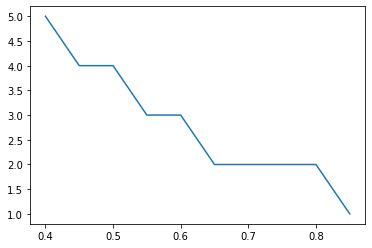

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
dia = [5, 4, 4, 3, 3, 2, 2, 2, 2, 1]
prob = [round(x * 0.01, 2) for x in range(40, 90, 5)]

plt.plot(prob, dia)  
plt.show()

##### 